In [77]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from imblearn.over_sampling import SMOTE
from collections import Counter # To check class distribution
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
import numpy as np # Often useful for numerical operations

print(tf.__version__)

2.18.0


In [20]:
dataset = pd.read_csv("/creditcard_2023.csv")
dataset.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [22]:
# Check for null values and datatypes
#dataset.isna().sum()
dataset.dtypes

,0
id,int64
V1,float64
V2,float64
V3,float64
V4,float64
V5,float64
V6,float64
V7,float64
V8,float64
V9,float64


In [15]:
X = dataset.iloc[:,1:30]
y = dataset.iloc[:,30]


In [79]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Use stratify=y to ensure that both training and test sets have the same (imbalanced) class proportion.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=y)

In [85]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [87]:
# Applying SMOTE to reduce imbalance in classes
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)
Counter(y_train)

Counter({0: 227452, 1: 227452})

In [88]:
# Creating ANN layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, Dropout, ReLU

In [89]:
#Initializing ANN
classifier = Sequential()

In [90]:
X_train.shape

(454904, 29)

In [91]:
## Adding the input layer
classifier.add(Dense(units = 29, activation= 'relu'))


In [92]:
## adding hidden layer 1
classifier.add(Dense(units = 11, activation ='relu'))
classifier.add(Dropout(0.3))

In [93]:
## adding hidden layer 2
classifier.add(Dense(units = 10, activation ='relu'))
classifier.add(Dropout(0.3))

In [94]:
## adding hidden layer 3
classifier.add(Dense(units = 9, activation ='relu'))
classifier.add(Dropout(0.3))

In [95]:
## Output layer
classifier.add(Dense(1, activation='sigmoid'))

In [96]:
#Compiling the model
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [97]:
# early stopping callback
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [98]:
model_history = classifier.fit(X_train,y_train,validation_split = 0.33, batch_size  = 32 , epochs = 1000, callbacks=[early_stopping])

Epoch 1/1000
9525/9525 ━━━━━━━━━━━━━━━━━━━━ 55s 5ms/step - accuracy: 0.9417 - loss: 0.1800 - val_accuracy: 0.9931 - val_loss: 0.0286
Epoch 2/1000
9525/9525 ━━━━━━━━━━━━━━━━━━━━ 67s 4ms/step - accuracy: 0.9872 - loss: 0.0432 - val_accuracy: 0.9950 - val_loss: 0.0208
Epoch 3/1000
9525/9525 ━━━━━━━━━━━━━━━━━━━━ 54s 5ms/step - accuracy: 0.9911 - loss: 0.0309 - val_accuracy: 0.9962 - val_loss: 0.0138
Epoch 4/1000
9525/9525 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.9928 - loss: 0.0278 - val_accuracy: 0.9970 - val_loss: 0.0146


In [71]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

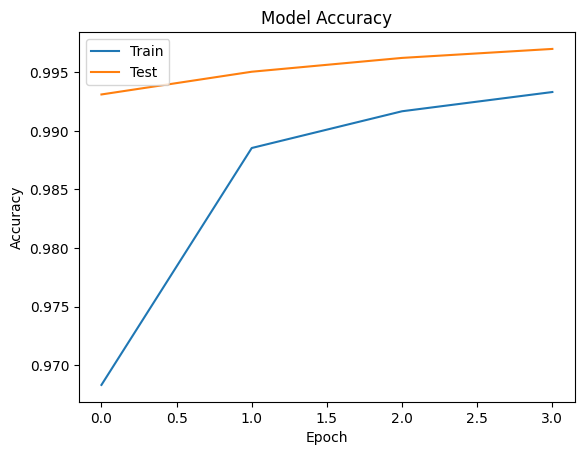

In [99]:
# plotting accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

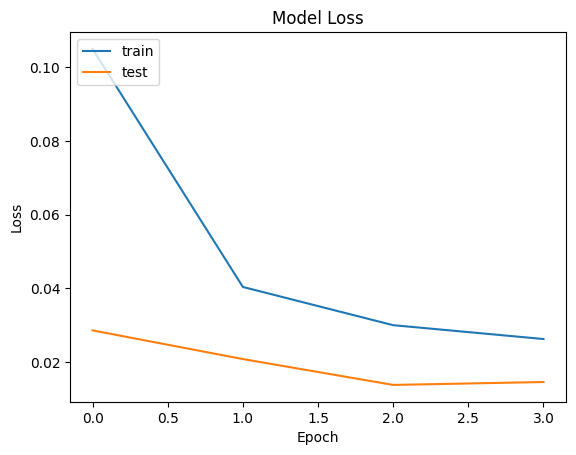

In [100]:
# history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [101]:
# Making some predictions
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

3554/3554 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


In [102]:
## creating confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm  = confusion_matrix(y_test,y_pred)
cm

array([[56697,   166],
       [  188, 56675]])

In [103]:
## Calculating the accuracy
score = accuracy_score(y_pred,y_test)
score

0.9968872553329934

In [104]:
y_pred_proba = classifier.predict(X_test) # Outputs probabilities for class 1
y_pred_binary = (y_pred_proba > 0.5).astype(int) # Convert probabilities to binary predictions (0 or 1)


3554/3554 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


In [105]:
print(f"Precision: {precision_score(y_test, y_pred_binary):.4f}")
print(f"Recall (Sensitivity): {recall_score(y_test, y_pred_binary):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_binary):.4f}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Average Precision (PR-AUC): {average_precision_score(y_test, y_pred_proba):.4f}")


Precision: 0.9971
Recall (Sensitivity): 0.9967
F1-Score: 0.9969
AUC-ROC: 0.9998
Average Precision (PR-AUC): 0.9997


In [111]:
model_filename_keras = 'my_fraud_detection_model_b4_check.keras'
classifier.save(model_filename_keras)

print(f"Model saved successfully to {model_filename_keras}")

Model saved successfully to my_fraud_detection_model_b4_check.keras
